# Titanic dataset EDA

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Importing data and understanding the nature of variables

In [54]:
df1 = pd.read_csv('./train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Age,cabin and embarked have null values
#### Age can be filled with mean values, and embaked with mode of the data
#### Name, Ticket and passenger ID seem to be redundant in the study

In [58]:
print(df1.Pclass.nunique(),X_data.Embarked.nunique(),X_data.Sex.nunique())

3 3 2


In [59]:
df1.Embarked.unique()
#print(df1.Ticket.tolist())

array(['S', 'C', 'Q', nan], dtype=object)

In [60]:
#df1[df1['Sex']=='male'].Age.mean() #30.72
#df1[df1['Sex']=='female'].Age.mean() #27.91

In [61]:
print(df1.Sex.value_counts(),'\n')
print(df1.Pclass.value_counts(),'\n')
print(df1.Embarked.value_counts(),'\n')

male      577
female    314
Name: Sex, dtype: int64 

3    491
1    216
2    184
Name: Pclass, dtype: int64 

S    644
C    168
Q     77
Name: Embarked, dtype: int64 



<AxesSubplot:xlabel='Sex'>

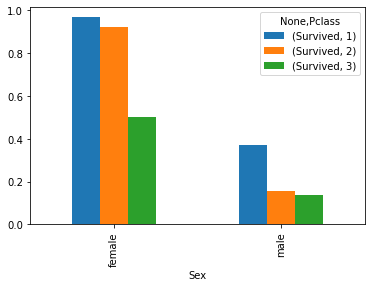

In [78]:
pd.pivot_table(df1,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.mean).plot(kind = 'bar')

#### Females with cabin class 1 had very high chance sof survival and generally as the cabin class loweres the chance of survival also lower

<AxesSubplot:xlabel='Embarked'>

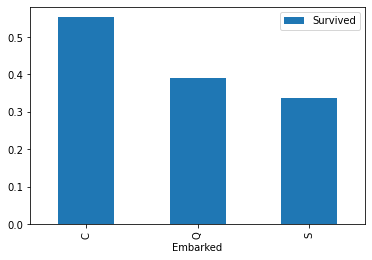

In [80]:
pd.pivot_table(df1,index=['Embarked'],values=['Survived'],aggfunc=np.mean).plot(kind = 'bar')

In [19]:
X_data = df1.drop(['PassengerId', 'Name', 'Survived', 'Ticket'], axis = 1)
Y_data = df1['Survived']

In [20]:
X_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
